### Implemeting Simple chat bot using LangGraph

### Video is 12.64

In [16]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

### Reducers

from typing import Annotated
from langgraph.graph import add_messages


In [15]:

from typing import TypedDict

class State(TypedDict):
    message:Annotated[list,add_messages]

In [17]:
from dotenv import load_dotenv
import os
load_dotenv()
from langchain_openai import ChatOpenAI
from langchain_groq import ChatGroq

In [18]:
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [ ]:
open_llm=ChatOpenAI(model="gpt-4o")
groq_llm =ChatGroq(model="qwen/qwen3-32b")



In [35]:
groq_llm.invoke("What is AI ?")

AIMessage(content='<think>\nOkay, so the user asked, "What is AI?" Let me start by recalling what I know. AI stands for Artificial Intelligence. But I need to make sure I explain it clearly. Maybe start with a simple definition. Artificial Intelligence is the simulation of human intelligence processes by machines, especially computer systems.\n\nHmm, but that\'s a bit technical. Maybe break it down. Mentioning things like learning, reasoning, problem-solving, perception. Also, there are different types of AI. General AI versus Narrow AI. Wait, General AI doesn\'t exist yet, right? So maybe focus on Narrow AI, which is what we have now. Examples like Siri, Alexa, recommendation systems on Netflix or Amazon.\n\nOh, and the key components: machine learning, deep learning. Those are subsets of AI. Machine learning uses algorithms to learn from data, while deep learning uses neural networks with many layers. Maybe mention some applications like self-driving cars, medical diagnosis, fraud de

In [55]:
# Building the Chatbot Node

def super_bot(state:State):
    return {"message":[open_llm.invoke(state["message"])]}



In [56]:
## compiling the flow
from langgraph.graph import StateGraph,START,END
graph = StateGraph(State)

graph.add_node("super_bot",super_bot)
graph.add_edge(START,"super_bot")
graph.add_edge("super_bot",END)

graph_builder=graph.compile()



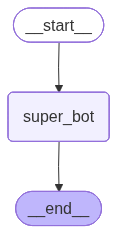

In [57]:
from IPython.display import Image,display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [42]:
graph_builder.invoke({'message':"what is AI?"})

{'message': [HumanMessage(content='what is AI?', additional_kwargs={}, response_metadata={}, id='fbf0b4d8-24f9-46b7-9f6a-29ab4e031991'),
  AIMessage(content='<think>\nOkay, so I need to figure out what AI is. Let me start by recalling what I know. AI stands for Artificial Intelligence. But what does that mean exactly? I think it\'s about making machines or computers do things that usually require human intelligence. But I\'m not sure. Maybe it\'s like making a computer play chess or recognize faces? But there\'s more to it, right?\n\nFirst, I should break down the term. Artificial means man-made, so it\'s not natural. Intelligence refers to the ability to learn, understand, and apply knowledge. So combining them, AI is the simulation of human intelligence by machines. But how is that done? I remember hearing about machine learning, which is a subset of AI. Maybe AI uses algorithms to process data and make decisions or predictions.\n\nWait, there are different types of AI. I think there

In [58]:
while True:
    what = input("what you want to know? :")
    result = graph_builder.invoke({'message':what})
    print("AI Says :", result)
    user_input = input("Type somthing (or 'exit'to quit):")
    if user_input.lower()=="exit":
        print("Exiting the loop. Goodbye")
        break
  


AI Says : {'message': [HumanMessage(content='Tell me about sun in two lines', additional_kwargs={}, response_metadata={}, id='bb87975f-b4c3-475e-a069-a5038d9eea1a'), AIMessage(content='The Sun is a massive, glowing ball of hot plasma at the center of our solar system, primarily composed of hydrogen and helium. It is the main source of energy for Earth, powering processes like photosynthesis and influencing our climate and weather patterns.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 49, 'prompt_tokens': 14, 'total_tokens': 63, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f33640a400', 'id': 'chatcmpl-CM1KTeTQXx6A6ruBrrLGDzDAnIRGY', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--80af1ba8